# TASK 9 - Recharge-Oscillator Model - :

## Task-9_ROModel:

In questo Task applico ai dati BOTTINO il modello teorico perfezionato da Jin e ri-utilizzato nell'artocolo del 2021.
$$
\frac{dT_E}{dt} = RT_E + F_1h_W
$$
$$
\frac{dh_W}{dt} = -\epsilon h_W - F_2T_E
$$

E' un sistema di 2 equazioni differenziali lineari accoppiate tra loro.
**Varaibili:**
- $T_E$: eastern equatorial Pacific SSTA (anomaly)
- $h_W$:  warm pool thermocline depth anomaly

**Parametri:**
- $R= DD + TH + ZA + MA + VA - TD$ = 0.79 1/year. Six dominant positive and negative feedbacks that determine the growth of eastern Pacific SSTA.
   *Dynamical damping, (DD), the thermocline feedback (TH), the zonal advective feedback (ZA), the meridional advective feedback (MA), the vertical advective feedback (VA), and the thermodynamic damping (TD)*
- $\epsilon = (1−r_Wr_e)C/2L$. Dynamic adjustment rate of the equatorial warm pool thermocline depth = 1.40 1/year, formula a pg.131 in basso a dx.
- $F_1 = ZA + MA - VA + TH$  = 0.46 °C/m*year. Ocean dynamic feedback from anomalous zonal advection and vertical heat advection associated with the discharge/recharge of equatorial warm pool heat content
- $F_2 = k\mu_a$. Efficiency of the recharge/discharge driven by equatorial wind stress anomalies induced by the ENSO SSTA = 18.2 m/°C*year, formula a pg.131 in basso a dx.
I valori scalari mostrati sono delle media annuali ricavate dai dati mensili SODA‐3.3.1.

**Cose da fare:**
- Trascrivere il sistema di equazioni nell'equivalente computazionele discretizzandola
- Mediare i campi in quel box:
   - For simplicity, we use the Niño‐3 index (SSTAs averaged over 5°S–5°N, 150°–90°W) to represent ENSO SST anomalies.
   - The averaged thermocline depth anomalies over the eastern Pacific box (5°S–5°N,155°–80°W) [questo è h_E], and $h_W$ the averaged thermocline depth anomalies over the western Pacific box (5°S–5°N, 120°E–155°W)
- Inserire i parametri di default delle equazioni definiti nell'articolo
- far avanzare / integrare le equazioni nel tempo per gli ultimi 500 anni

### Nota:
- Articolo di riferimento:  **Simple ENSO Models**,  Fei‐Fei Jin, 2021

### Soluzione analitica

Inizialmente assumo che:
- I parametri: $R$, $F_1$, $F_2$, $\epsilon$ siano costanti. In realtà sono dipendenti dal tempo e dallo spazio e sicuramente anche dalla SST stessa... insomma un bel poccio.

Le due equazioni costituiscono un sistema, sono interdipendenti una dall'altra. Uno dei metodi di risoluzione è per sostituzione.

Data l'equazione differenziale lineare del primo ordine:

$$
\frac{dF}{dt}=c\,F(t)+d,
$$

con $c,d$ costanti.

#### Risoluzione

1. Equazione omogenea:

$$
\frac{dF_h}{dt}=cF_h \quad\Rightarrow\quad F_h(t)=A e^{c t},
$$

dove $A$ è una costante arbitraria.

2. Una soluzione particolare $F_p$. Per coefficienti costanti si prova una soluzione costante $F_p=$ const. Sostituendo:

$$
0=cF_p+d \quad\Rightarrow\quad F_p=-\frac{d}{c},
$$

valida se $c\neq0$.

3. Soluzione generale (per $c\neq0$):

$$
F(t)=F_h(t)+F_p = A e^{c t}-\frac{d}{c}.
$$

Data la condizione iniziale $F(0)=F_0$, allora

$$
A = F_0 + \frac{d}{c},
$$

quindi

$$
\boxed{\,F(t)=\Big(F_0+\frac{d}{c}\Big)e^{c t}-\frac{d}{c}\,}\quad (c\neq0).
$$

##### Caso $c=0$

L’equazione diventa $\dfrac{dF}{dt}=d$, quindi

$$
\boxed{\,F(t)=d\,t + A\,}
$$

e con $F(0)=F_0$ si ha $F(t)=d\,t+F_0$.

##### Interpretazione qualitativa

La quantità stazionaria (equilibrio) è $-d/c$. Se $c<0$ le soluzioni esponenzialmente tendono a $-d/c$; se $c>0$ si allontanano esponenzialmente.


### Soluzione Approssimata: Regressione/Fit lineare
Il problema è che i parametri non sono dei banali scalari ma $\epsilon$ e $F_2$ sono definiti da delle espressioni parametriche, mentre $R$ e $F_1$ sono una condensazione di più parametri che dipendono anche dalle variabili stesse, per cui è molto difficile fornire un'espressione da inserire nell'equazione e quest'espressione conterrebbe delle implicità no banali da separare e isolare. Di conseguenza ho solo 2 equazioni quando le variabili sono 4, per cui il sistema risulta indeterminato.
Lo scopo non è tuttavia risolvere analiticamente il sistema in tutte le sue parti, ma attraverso l'implementazione di un calcolatore a nostra disposizione ricavare una STIMA dei parametri (coefficienti) dell'equazione.

--> Invece di risolvere analiticamente il sistema, lo approssimo attraverso un fit lineare/una regressione lineare multipla. Multipla in quanto i fattori indipendenti, le $X$, sono più di uno: $T_E$, $h_W$.

**Il modello da applicare:**
$$
Y_i = {\beta}_0 + {\beta}_1X_{1i} + ... + {\beta}_kX_{ki} + {\epsilon}_i
$$

Le vere incognite infatti NON sono $T_E$ e $h_W$ e le loro derivate, questi campi li possediamo e li ho già calcolati tra l'altro. Le vere incognite sono i coefficienti $R$, $F_1$, $\epsilon$, $F_2$, che nel modello di regressione lineare costituiscono la matrice $A$ dei coefficienti ($\beta_i$): $A = [[R, F_1], [-\epsilon, -F_2]]$.

Se il valore di $R^2$ è buono (anche se solo superiore a 0.5 è un buon risultato) allora significa che il (modello di) fit lineare è in grado di fornire una buona misura dei coefficienti, che più in generale relazione lineare semplificata dell'equazione ne è una buona semplificazione.
> - L'R², o coefficiente di determinazione, è una misura della bontà dell'adattamento (in inglese fitting) della regressione lineare stimata ai dati osservati.
> - l'R² misura la frazione della variabilità delle osservazioni $y_i$ che siamo in grado di spiegare tramite il modello lineare.
> - L'R² non misura se effettivamente sussista una relazione (di qualsiasi tipo) tra le $y_i$ (osservazioni della variaibile dipendente) e i regressori ($X_i$), ma soltanto fino a che punto un modello lineare consente di approssimare la realtà dei dati osservati.

Questo modello è da applicare ad entrambe le equazioni (che quindi non le si considerano più in un sistema) e ripetere per ogni run BOTTINO determiando se tali coefficienti mutano da un run all'altro. Questa sarebbe la scoperta vera e propria perchè indicherebbe che si modificano i contributi dei feedback/interazioni rappresentati da questi parametri, testimoniando l'ipotesi fatta (da Susanna e Federico) per spiegare l'andamento non lineare di ENSO tra i vari run, ovvero che ci sono 2 principali Feedback ( ad alta frequenza (che io ho ipotizzato essere Atmosferico), che influenza il fenomeno nell'immediato, quando il sistema è fortemente in disequilibrio e uno a bassa (Oceanico), che influenza il sistema con una latenza maggiore verso la fine del periodo transiente) che modificano il loro contributo/intensità a seconda del livello di riscaldamento del sistema, indicato dalla $GTAS$. Inizialmente il feedback ad alta frequenza è dominante e porta ad un'incremento considerevole dell'intensità di ENSO nei primi run, poi dal b065 in poi (ricordo che il massimo della STD l'abbiamo per un run ipotetico tra b050 e b065) il 2° feedback prende il sopravvento (non possiamo supporre il modo in cui lo fa, ovvero se diventa più grande del primo che rimane fisso o cresce più velocemente di questo o quest'ultimo cala il suo contributo e l'altro aumenta...) e riporta il sistema in una condizione di minor variaibilità (nell'intensità).

L'obiettivo ultimo più grande quindi è capire se il modello di RO è in grado di spiegare la fenomenologia che abbiamo osservato di ENSO attraverso un modello estremamente più complesso (Ec-Earth3).

#### Nota Bene
La derivata dei campi la si calcola attraverso la funzione .diff di numpy o .differentiate() di xarray. Banalmente questa funzione dato $\frac{df(x)}{dx}$ calcola $\frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_{i}}$ (non so se di default è in modo forward o bacward o centered).

Questo è un confronto con il grafico delle STD del Task5, dunque il calcolo andrebbe fatto con i campi calcolati: in tutto il periodo d'integrazione (non prioritario), gli ultimi 100 anni, e specialmente gli ultimi 500 anni (violin plot).


Interp. Spline vs Interpolazione
>"Interpolation is the general process of finding values between a set of known data points, while spline interpolation is a specific,
>more advanced technique that creates a smooth, continuous curve using piecewise low-degree polynomials.
>Unlike simple methods like linear interpolation (connecting points with straight lines),
>splines ensure the resulting curve is smooth and continuous at the connection points, or "knots"."...

In [ ]:
""" Test script """

In [ ]:
Messaggio per Fede:
- perchè mi genera 10 volte più chunks per il: "Slicing with an out-of-order index is generating 10 times more chunks"? possiamo sistemarlo? ho provato a fare rechunking dopo il passaggio al dataArray in questo modo: chunk(time: 10, lev:-1, lat:-1, lon: -1) ma 1° dà errore (a seconda di dove lo faccio), 2° oppure funziona ma rimane lo stesso Warning

In [20]:
"""
Task 9 Recharge Oscillator Model

- Script di calcolo delle anomalie dei campi e le rispettive derivate di 'tos' e 'thetao',
per poterle utilizzare nell'equazione del modello di Jin del Recharge-Oscillator attraverso la semplificazione con modello lineare di regressione.

Nota: Ho cercato di eseguire la miglior ottimizzazione possibile con Dask, attraverso anche la definizione di 'chunks'.
Tuttavia, visto che lavoro solo su una piccola fetta del mondo (e non su tutto il mondo) i chunk non sono ottimizzati, sono troppo piccoli, quindi non si h aun beneficio effettivo nel tempo di calcolo.
Ad ogni modo la pipeline di Dask costituisce la base di partenza per altri scripts.
"""
# import libraries
## System libraries
import sys
import logging
## General data analisys libraries 
import numpy as np
import xarray as xr
from dask.distributed import Client, LocalCluster
## Time library
import cftime
from datetime import datetime
# Personal library
import AllePowerFunctions as apf

#  Configurazione messaggi di logging
logging.basicConfig(
   level=logging.DEBUG,    # Garantisce che DEBUG passi
   format="%(asctime)s %(levelname)s %(name)s: %(message)s",
   datefmt="%H:%M:%S",
   force=True              # Per Jupyter/ambienti già configurati
)

# Aumento i numero di worker Dask e limito la RAM
cluster = LocalCluster(
    n_workers=4,           # Numero di processi indipendenti
    threads_per_worker=1,  # Evita oversubscription della CPU
    memory_limit='5GB'    # Limita RAM per worker
)
client = Client(cluster)
client.dashboard_link

# Directories
## Home
common_dir_home = '/home/montanarini/ELNINO/'
dir_output_9 = 'output/Task-9_ROModel/'

## Dataset Recovering 
common_dir_ds = '/nas/'
### pi-control
dir_pi = 'archive_CMIP6/CMIP6/model-output/EC-Earth-Consortium/EC-Earth3/piControl/'
dir_pi_tos = 'ocean/Omon/r1i1p1f1_r25/tos/*.nc'
### Bottini
dir_BOTTINI = 'BOTTINO/irods_data/stabilization-{}/r1i1p1f1/'
dir_bxxx = '{}/*.nc'

# Constants
secondi_mese = 60*60*24*30.43803025425 # Durata media mese: 365.256363051/12

# Keywords: datasets, variables and path completion
## Datsets
dataset_names = ['b990'] #['pi-control', 'b990','b025', 'b050', 'b065', 'b080', 'b100']
dataset_names_iteration = len(dataset_names)
### Completamento dei path dei bottini
bottini_paths = ['hist-1990'] #['hist-1990','ssp585-2025', 'ssp585-2050', 'ssp585-2065', 'ssp585-2080', 'ssp585-2100']

## Definisco le liste di variaibli (Oceaniche)
var_names = ['tos', 'thetao']
var_names_iteration = len(var_names)

# Parametri
# valori da usare (i) confronto per violin-plot: 500, 360, 500; (ii) confronto per scatter-plot: [[1000, 360, 1000], [100, 360, 100]]
time_window = 100 # ultimi n anni del Dataset (non per hist e obs), default: 500
time_rm = 120 # Mesi in cui si applica la RM, default: 360
print("\nThe following set of parameters was selected:",
   "\n- Last n years of the bottino runs: ", time_window,
   "\n- Running Mean time, in months (for the historical detrending): ", time_rm)

# Flag per eseguire le cose una volta sola
flag_continental = True

# Dizionario contenente i path dei vari Datasets per ogni variabile
directories = {}
for i, datasetN in enumerate(dataset_names):
   directories[datasetN] = {}
   for var in var_names:
      # Aggiunta dei path non bottino
      if datasetN in ['pi-control']:
         directories[datasetN][var] = [common_dir_ds + dir_pi + 'ocean/Omon/r1i1p1f1_r25/' + var + '/*.nc']
      # Aggiunta dei path bottino
      elif datasetN in ['b990','b025', 'b050', 'b065', 'b080', 'b100']:
         directories[datasetN][var] = [(common_dir_ds + dir_BOTTINI).format(bottini_paths[i-1]) + 'Omon_r25/' + dir_bxxx.format(var_names[var_names.index(var)])]

# Creo delle liste per salvare i tempi impiegati per ogni dataset ('_a' è per il punto 2 (a), '_b' è per il punto 2 (b))
time_begin_var = [None] * var_names_iteration
time_end_var = [None] * var_names_iteration
time_var = [None] * var_names_iteration
time_begin_ds = [None] * dataset_names_iteration
time_end_ds = [None] * dataset_names_iteration
      
# Iterazione sulle Variabili
for i, var in enumerate(var_names):
   
   time_begin_var[i] = datetime.now()
   # Seleziona solo la variaibile n ed escludi le altre
   # if var not in ['thetao']:
   #    time.sleep(1)
   #    time_end_var[i] = datetime.now()
   #    time_var[i] = (time_end_var[i]-time_begin_var[i])
   #    continue

   print(f"\n# Inizia l'elaborazione della variabile: {var}")

   # Iterazione sui Dataset
   for j, datasetN in enumerate(dataset_names):
      time_begin_ds[j] = datetime.now()
      
      # Assegna la stringa formattata alla variabile con il nome appropriato
      print(f"\n## Inizia l'elaborazione di: Dataset_{datasetN}\nCorresponding path: ", directories[datasetN][var])
      

      print("\nStart of Dataset opening/upload")

      ###################################################################################################################################
      #################################### (a) Discrimination based on the Dataset of origin ############################################

      if datasetN in ['b990','b025', 'b050', 'b065', 'b080', 'b100']:
         # Apertura dataset
         Dataset = xr.open_mfdataset(
            directories[datasetN][var][0],
            use_cftime=True,
            parallel=True,
            chunks={'time': 10, 'lev': -1, 'lat': 10, 'lon': 50} # NB: le dimensiioni non presenti (lev in tos ad esempio) vengono ignorate
         )
         
      elif datasetN in ['pi-control']:
         # Apertura dataset
         Dataset = xr.open_mfdataset(
            directories[datasetN][var][0],
            decode_times=True,
            use_cftime=True,
            parallel=True,
            chunks={'time': 10, 'lev': -1, 'lat': 10, 'lon': 50}
         )
                         
      # Riordinamento coordinate per evitare frammentazione dei chunks
      #Dataset = apf.sort_dataset_coords(Dataset)#.rechunk({'time': 10, 'lev': -1, 'lat': 10, 'lon': 50})
      
      # Discriminazione del range temporale:     
      max_year = Dataset['time'].max()
      min_year = Dataset['time'].min()
      # Estremi per i Bottini
      sup_year_bott = cftime.DatetimeProlepticGregorian(int(max_year.dt.year), 1, 1)
      inf_year_bott = cftime.DatetimeProlepticGregorian(int(max_year.dt.year-time_window), 1, 1)
      date_format = '%Y-%m-%d'

      # Limitazione del range temporale
      Dataset = Dataset.sel(time=slice(inf_year_bott, sup_year_bott))

      print("\nStart of time and space variable selection")
      time_begin_var[j] = datetime.now()

      if var in ['tos']:
         # Passaggio al DataArray
         campo = Dataset['tos'].sel(lat=slice(-5, 5), lon=slice(210, 270)) # Nino3 zone for SSTA: eastern equatorial Pacific SSTA (TE)

         # Detrending del campo e calcolo dell'anomalia
         campo_detrend, anomaly_detrend, trend_hist, seasonal_cycle = apf.detrending(campo, time_rm)
         # Maschera continentale
         if flag_continental == True:
            continental_mask = np.isnan(campo)[0,...]
            flag_continental = False
         # Calcolo la derivata dell'anomalia
         anomaly_detrend = anomaly_detrend.chunk({'time': 10, 'lat': 10, 'lon': 50})  # Rechunking del campo dopo la funzione di detrending(). {'time': -1} se vuoi un unico blocco
         Danom_Dt = anomaly_detrend.differentiate('time') * secondi_mese

         # Condensazione ad array 1D, discriminazione sul tipo di variaibile: zonale (time, lat, lon) o verticale (time, lat, lon, lev)
         #campo_detrend = apf.global_mean(campo_detrend)
         anomaly_detrend = apf.global_mean(anomaly_detrend)
         Danom_Dt = apf.global_mean(Danom_Dt)

         # Salvataggio dei campi
         print("\nStart saving the evaluated variables. Dataset: ", datasetN, ", Variable :", var)
         ds = xr.Dataset(
            data_vars=dict(
               anomaly = anomaly_detrend,
               Danom_Dt = Danom_Dt,
            )
         ).to_netcdf(common_dir_home + dir_output_9 + f'Task-9_{datasetN}-{var}.nc', compute=True)

      elif var in ['thetao']:
         # Passaggio al DataArray
         campo = Dataset['thetao'].sel(lev=slice(0,300), lat=slice(-5, 5), lon=slice(120, 205)) # Warm Pool region for Thermocline Depth Anomaly (hw), limitation to the Mixing Layer.
         
         # Controllo dei chunks
         ## Informazioni sui chunk
         chunks = campo.data.chunks  # tuple di tuple: una per dimensione
         dtype_size = campo.data.dtype.itemsize  # byte per elemento
         ## Calcola il numero di elementi per chunk (in genere prendiamo il primo per stimare)
         chunk_shape = tuple(dim[0] for dim in chunks)
         n_elements = np.prod(chunk_shape)
         bytes_per_chunk = n_elements * dtype_size
         print(f"Chunk shape: {chunk_shape}")
         print(f"Bytes per chunk: {bytes_per_chunk / 1e6:.2f} MB")

         # Detrending del campo e calcolo dell'anomalia
         campo_detrend, anomaly_detrend, trend_hist, seasonal_cycle = apf.detrending(campo, time_rm)
         
         # Preparazione al calcolo della termoclina
         ## Coordinate
         lev = campo_detrend['lev']
         lon = campo_detrend['lon']
         ## Interpolazione longitudine
         lev_ext = xr.DataArray(np.linspace(lev.min().values, lev.max().values, 500), dims=['lev'])
         lon_ext = np.linspace(lon.min(), lon.max(), 500)
         lon_ext_coord = xr.DataArray(lon_ext, dims=['lon_ext']) # Crea un DataArray per allineare le coordinat
         ## Media latitudinale
         campo_tofunc = apf.meridional_mean(campo_detrend)

         ## Applico l'interpolazione spline alla coordinata di profondità (z) -'lev'- per ogni punto di longitudine e ricalcolo il valore del campo nei nuovi punti
         # Interpolazione: 3 modi
         # Modo 1: DataArrray.interp()
         # campo_tofunc_interp = campo_tofunc.interp(coords={'lev': lev_ext}, method="linear")  # Dask-friendly e vettorizzato. questo metodo richiede di fare un .compute() a 'idx_max' nella funzione thermocline_Xarray()
         # Modo 2: usando la mia funzione che applica una funzione scipy con apply_ufunc()
         # ## Applico l'interpolazione spline alla coordinata di profondità (z) -'lev'- per ogni punto di longitudine e ricalcolo il valore del campo nei nuovi punti
         # funzione che rompe la lazy evaluation. c'è un .compute() dentro la funzione che manda tutto a puttane per la paralellizzazione. calcola la spline per l'interp, che tecnicamente è meglio che la semplice interpolazione.
         # campo_tofunc_interp = apf.spline_interpolation(
         #    campo_tofunc,
         #    lev_ext,
         #    "lev",
         #    4,
         #    "natural"
         # ).transpose('time', 'lon', 'lev')#.chunk({'time': 10, 'lon': 50}) # Riordino le dimensioni in modo che ci siano per prima le non core ('time', 'lat') e poi le core ('lon', 'lev') e forzo la coerenza con un chunking
         # Modo 3: usando map_blocks() per applicare una funzione scipy ma in modo flessibile ossia per chunks che gli vengono passati.
         campo_tofunc_interp = apf.spline_interpolation_along_dim(
            campo_tofunc,
            lev_ext,
            "lev",
            "cubic"
         )#.transpose('time', 'lon', 'lev').chunk({'time': 10, 'lon': 50}) # Riordino le dimensioni in modo che ci siano per prima le non core ('time', 'lat') e poi le core ('lon', 'lev') e forzo la coerenza con un chunking
         
         # N. Calcolod della Termoclina 
         interpol = False # Flag per abilitare o meno l'interpolazione
         termocline, depth_max_grad, temp_max_grad = apf.thermocline(campo_tofunc_interp, interpol) # La termoclina restituitita ha valori positivi sull'asse 'lev' , quindi sono da invertire moltiplicando *(-1)
         termocline_anom = termocline - termocline.mean('time')
         
         ## Calcolo della derivata della termoclina
         #anomaly_detrend = anomaly_detrend.chunk({'time': -1})  # Rechunking del campo dopo la funzione di detrending()
         Dtermocline_anom_Dt = termocline_anom.differentiate('time')
         
         ## Riduzione dimensionale ad array 1D
         termocline_anom = termocline_anom.mean('lon')*(-1)
         Dtermocline_anom_Dt = Dtermocline_anom_Dt.mean('lon')*secondi_mese*(-1)

         # Salvataggio dei campi
         print("\nStart saving the evaluated variables. Dataset: ", datasetN, ", Variable :", var)
            
         ds = xr.Dataset(
            data_vars=dict(
               termocline_anom = termocline_anom,
               Dtermocline_anom_Dt = Dtermocline_anom_Dt,
            )
         ).to_netcdf(common_dir_home + dir_output_9 + f'Task-9_{datasetN}-{var}.nc', compute=True)
      
      ### Uscita dal loop sui Dataset ###
   
      # Dataset time recap
      time_end_ds[j] = datetime.now()
      print("\nEnd dataset elaboration")
      print("Dataset {} took {}".format(datasetN, time_end_ds[j]-time_begin_ds[j]))

   ### Uscita dal loop sulle variabili ###
   
   # Variable time recap
   time_end_var[i] = datetime.now()
   time_var[i] = (time_end_var[i]-time_begin_var[i])
   print("\nEnd of variable evaluation")
   print("Variable {} took {}".format(var_names[i], time_var[i]))

# Time recap
print("\n## Timing recap")
for i, var in enumerate(var_names):
   print("\nOverall evaluation of ", var, " for all the Datasets took {}".format(time_var[i]))

print("\nOverall evaluation of the script was completed in {}".format(np.sum(time_var)))
print("\nEnd of the script")

# Chiusura client e cluster Dask
client.close()
cluster.close()

17:33:05 DEBUG asyncio: Using selector: EpollSelector
/home/montanarini/miniforge3/envs/ctl4b/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46597 instead
  warnings.warn(



The following set of parameters was selected: 
- Last n years of the bottino runs:  100 
- Running Mean time, in months (for the historical detrending):  120

# Inizia l'elaborazione della variabile: tos

## Inizia l'elaborazione di: Dataset_b990
Corresponding path:  ['/nas/BOTTINO/irods_data/stabilization-hist-1990/r1i1p1f1/Omon_r25/tos/*.nc']

Start of Dataset opening/upload

Start of time and space variable selection


/home/montanarini/miniforge3/envs/ctl4b/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]



Start saving the evaluated variables. Dataset:  b990 , Variable : tos

End dataset elaboration
Dataset b990 took 0:00:23.794668

End of variable evaluation
Variable tos took 0:00:11.154690

# Inizia l'elaborazione della variabile: thetao

## Inizia l'elaborazione di: Dataset_b990
Corresponding path:  ['/nas/BOTTINO/irods_data/stabilization-hist-1990/r1i1p1f1/Omon_r25/thetao/*.nc']

Start of Dataset opening/upload

Start of time and space variable selection
Chunk shape: (10, 34, 5, 2)
Bytes per chunk: 0.01 MB


/home/montanarini/miniforge3/envs/ctl4b/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]
17:33:46 INFO AllePowerFunctions: Interpolazione della termoclina sulle longitudini disabilitata, la funzione ritorna: depth_max_grad, depth_max_grad, temp_max_grad



Start saving the evaluated variables. Dataset:  b990 , Variable : thetao

End dataset elaboration
Dataset b990 took 0:02:57.848422

End of variable evaluation
Variable thetao took 0:02:57.848497

## Timing recap

Overall evaluation of  tos  for all the Datasets took 0:00:11.154690

Overall evaluation of  thetao  for all the Datasets took 0:02:57.848497

Overall evaluation of the script was completed in 0:03:09.003187

End of the script


In [ ]:
"""
Note sull'interpolazione:
Test sul tipo d'interpolazione:
1) Meglio usare un'interpolazione spline (mantiene la continuità della curva) che un'interpolazione normale, risulta meno precisa ma soprattutto NON mostra delle caratteristiche importanti della curva.
Calcolare la termoclina attraverso la spline produce risultati diversi che usare l'interpolazione "normale". l'ordine di grandezza non è enorme, però dal grafico quella ottenuta da Spline sembra molto più realistica (ad Est ha la ricaduta, non mostrata da quella ottenuta con interpolazione, che invece sembra semplicemnte monotona crescente)
Nell'ultimo grafico (scatter):
   - in verde è la differenza delle termocline calcolate in questi due modi diversi 
   - in rosso è la differenza delle derivate delle termocline calcolate nei due modi diversi rispetto la longitudine. Questa cresce all'avvicinarsi dell'Est boundary
2) Tra spline usando interp1d(kind='cubic') e CubicSpline cambia davvero poco e unicamente agli estremi del dominio. Suppongo sia lo stesso per un pò tutti i tipi di spline (splrep + splev); ecc...

Non ho verificato l'impatto di utilizzare la spline per interpolare i livelli della termoclina rispetto ad usare .interp() normale

"""

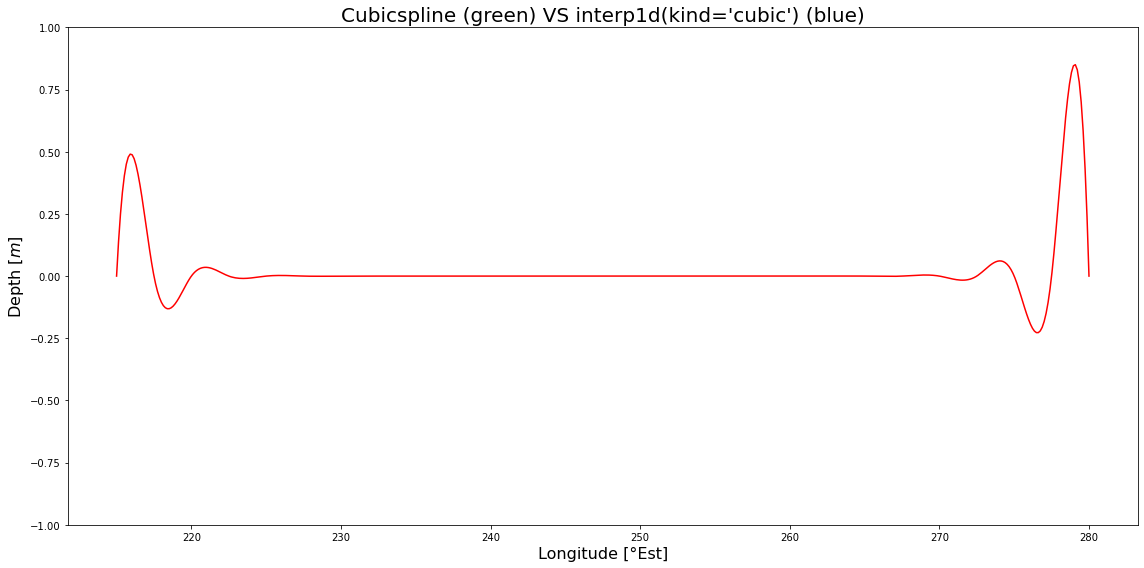

In [ ]:
""" Termoclina Cubicspline VS interp1d(kind= 'cubic') """
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(lon_ext, termoclina_sp, color='g')
ax.plot(lon_ext, termoclina_sp2, color='b')
ax.plot(lon_ext, termoclina_sp - termoclina_sp2, color='r')
ax.set_title('Cubicspline (green) VS interp1d(kind=\'cubic\') (blue)', fontsize=20)
ax.set_xlabel('Longitude [°Est]', fontsize=16)
ax.set_ylabel('Depth 'r'$[m]$', fontsize=16)
ax.set_ylim(-1, 1)
plt.tight_layout()
# Display the figure
plt.show()
# Chiusura immagine
plt.close()

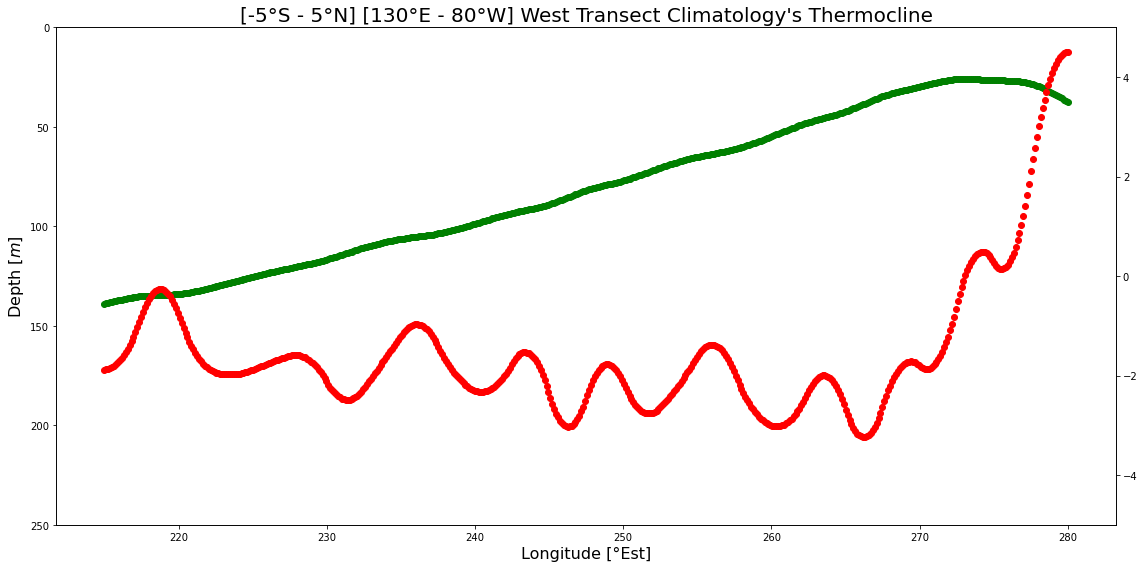

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
twin = ax.twinx()
ax.scatter(lon_ext, termoclina_interp_sp, color='g')
twin.scatter(lon_ext, DTermo_sp_Dt, color='r')
ax.set_title('[-5°S - 5°N] [130°E - 80°W] West Transect Climatology\'s Thermocline', fontsize=20)
ax.set_xlabel('Longitude [°Est]', fontsize=16)
ax.set_ylabel('Depth 'r'$[m]$', fontsize=16)
ax.set_ylim(250, 0)
twin.set_ylim(-5, 5)
#ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(120, 280)
# ax.set_xticklabels(ticks)#, y=-0.02)
plt.tight_layout()
# Display the figure
plt.show()
# Chiusura immagine
plt.close()

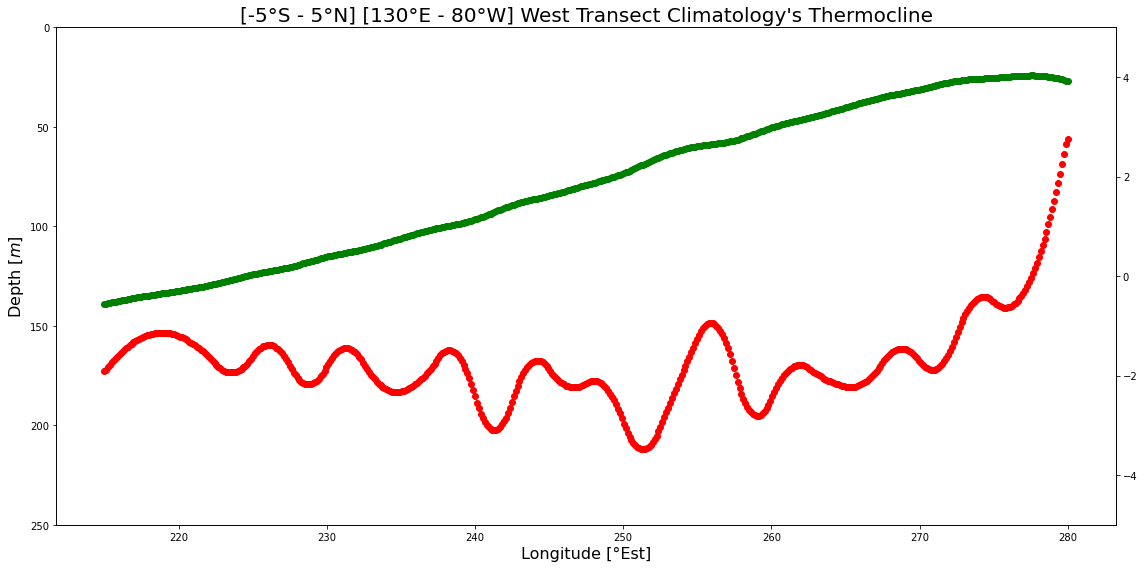

In [48]:
fig, ax = plt.subplots(figsize=(16, 8))
twin = ax.twinx()
ax.scatter(lon_ext, termoclina_interp.mean('time'), color='g')
twin.scatter(lon_ext, DTermo_Dt.mean('time'), color='r')
ax.set_title('[-5°S - 5°N] [130°E - 80°W] West Transect Climatology\'s Thermocline', fontsize=20)
ax.set_xlabel('Longitude [°Est]', fontsize=16)
ax.set_ylabel('Depth 'r'$[m]$', fontsize=16)
ax.set_ylim(250, 0)
twin.set_ylim(-5, 5)
#ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(120, 280)
# ax.set_xticklabels(ticks)#, y=-0.02)
plt.tight_layout()
# Display the figure
plt.show()
# Chiusura immagine
plt.close()

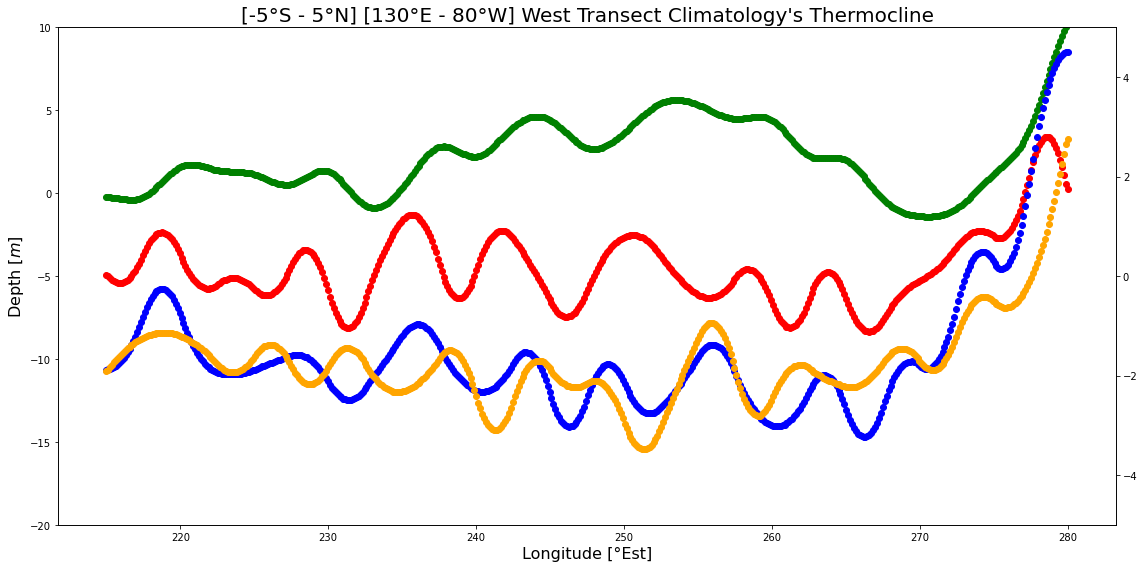

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
twin = ax.twinx()
ax.scatter(lon_ext, (termoclina_interp_sp - termoclina_interp.mean('time')), color='g')
twin.scatter(lon_ext, (DTermo_sp_Dt-DTermo_Dt.mean('time')), color='r')
twin.scatter(lon_ext, DTermo_sp_Dt, color='b')
twin.scatter(lon_ext, DTermo_Dt.mean('time'), color='orange')
ax.set_title('[-5°S - 5°N] [130°E - 80°W] West Transect Climatology\'s Thermocline', fontsize=20)
ax.set_xlabel('Longitude [°Est]', fontsize=16)
ax.set_ylabel('Depth 'r'$[m]$', fontsize=16)
ax.set_ylim(-20, 10)
#ax.axhline(y=5.0, linestyle='-', color='slategray', linewidth=2)
twin.set_ylim(-5, 5)
#ax.set_ylim(ax.get_ylim()[::-1])
# ax.set_xlim(120, 280)
# ax.set_xticklabels(ticks)#, y=-0.02)
plt.tight_layout()
# Display the figure
plt.show()
# Chiusura immagine
plt.close()

In [ ]:
""" FINE PARTE DI CALCOLO, INIZIO PARTE DI VISUALIZZAZIONE """

In [ ]:
# import libraries
## General data analisys libraries 
import xarray as xr
import numpy as np
## Plot libraries
#import matplotlib as mpl
import matplotlib.pyplot as plt

# Directories
## Home
common_dir_home = '/home/montanarini/ELNINO/'
dir_output_9 = 'output/Task-9_ROModel/'
dir_images_9 = 'images/Task-9_ROModel/'

# Keywords: datasets, variables and path completion
## Datsets
dataset_names = ['pi-control', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100']
dataset_names_iteration = len(dataset_names)
### Completamento dei path dei bottini

## Definisco le liste di variaibli (Oceaniche)
var_names = ['tos', 'thetao']

## Plots formatting string lists
colors = ['darkgray', 'blue', 'green', 'orange', 'red', 'brown', 'purple'] #['blue', 'green', 'orange', 'red', 'brown', 'purple', 'darkgray', 'olive']
markers = ["p", "*"]
area_500 = 400
area_100 = 200

# Dictionary for data acquisition
data = {}
# Dictionary for multi-linear regression function
indipendent_var_eq1 = {}
indipendent_var_eq2 = {}
## Dictionary expansion
for var in var_names:
    data[var] = {}
    for datasetN in dataset_names:
        data[var][datasetN] = [None]
        indipendent_var_eq1[datasetN] = {}
        indipendent_var_eq2[datasetN] = {}


# Lists delcarations for results
SSTA_smooth = []
DSSTA_Dt_smooth = []
termo_anom_smooth = []
Dtermo_anom_Dt_smooth = []

# Caricamento Variabili
print('Main loop, start loading the variables for Task-9_ROModel')
for i, var in enumerate(var_names):
    for j, datasetN in enumerate(dataset_names):
        filename = 'Task-9_{}-{}.nc'.format(datasetN, var)
        data[var][datasetN] = xr.open_dataset(common_dir_home + dir_output_9 + filename, use_cftime=True)
        print(f'Dati della variabile: {var} e dataset: {datasetN} caricati con successo')
        
        # Smoothing campi
        if var in ['tos']:
            SSTA_smooth.append(data[var][datasetN]['anomaly'].rolling(time=6, min_periods=1, center=True).mean().dropna("time"))
            DSSTA_Dt_smooth.append(data[var][datasetN]['Danom_Dt'].rolling(time=6, min_periods=1, center=True).mean().dropna("time"))

        elif var in ['thetao']:
            termo_anom_smooth.append(data[var][datasetN]['termocline_anom'].rolling(time=6, min_periods=1, center=True).mean().dropna("time"))
            Dtermo_anom_Dt_smooth.append(data[var][datasetN]['Dtermocline_anom_Dt'].rolling(time=6, min_periods=1, center=True).mean().dropna("time"))
            # Controllo e Interpolazione per estendere il range 
            if datasetN in ['pi-control'] and (len(termo_anom_smooth[j]) != len(SSTA_smooth[j])):
                termo_anom_smooth[j] = termo_anom_smooth[j].interp(time=SSTA_smooth[j].time, method="nearest")
            elif datasetN in ['pi-control'] and (len(Dtermo_anom_Dt_smooth[j]) != len(DSSTA_Dt_smooth[j])):
                Dtermo_anom_Dt_smooth[j] = Dtermo_anom_Dt_smooth[j].interp(time=DSSTA_Dt_smooth[j].time, method="nearest")
        
# Rimpimento dizionari delle variabili indipendenti
for i, var in enumerate(var_names):
    for j, datasetN in enumerate(dataset_names):
        indipendent_var_eq1[datasetN] = {
            'tos_anom': SSTA_smooth[j],
            'thetao_anom': termo_anom_smooth[j]
        }
        indipendent_var_eq2[datasetN] = {
            'thetao_anom': termo_anom_smooth[j],
            'tos_anom': SSTA_smooth[j]
        }
# Parameters: Regression Results
R = [None]*dataset_names_iteration
F_1 = [None]*dataset_names_iteration
epsilon = [None]*dataset_names_iteration
F_2 = [None]*dataset_names_iteration

# indipendent_var_eq2 = {
#    'thetao_anom': termo_anom_smooth,
#    'tos_anom': SSTA_smooth
# }
# NB moltiplicare per *(-1) uno solo o entrambi i mebri per la regressione (y o x1) non cambia nulla sul risultato della regressione stessa. R^2 rimane lo stesso.

Main loop, start loading the variables for Task-9_ROModel
Dati della variabile: tos e dataset: pi-control caricati con successo
Dati della variabile: tos e dataset: b990 caricati con successo
Dati della variabile: tos e dataset: b025 caricati con successo
Dati della variabile: tos e dataset: b050 caricati con successo
Dati della variabile: tos e dataset: b065 caricati con successo
Dati della variabile: tos e dataset: b080 caricati con successo
Dati della variabile: tos e dataset: b100 caricati con successo
Dati della variabile: thetao e dataset: pi-control caricati con successo
Dati della variabile: thetao e dataset: b990 caricati con successo
Dati della variabile: thetao e dataset: b025 caricati con successo
Dati della variabile: thetao e dataset: b050 caricati con successo
Dati della variabile: thetao e dataset: b065 caricati con successo
Dati della variabile: thetao e dataset: b080 caricati con successo
Dati della variabile: thetao e dataset: b100 caricati con successo


In [19]:
len(termo_anom_smooth[0])

5978

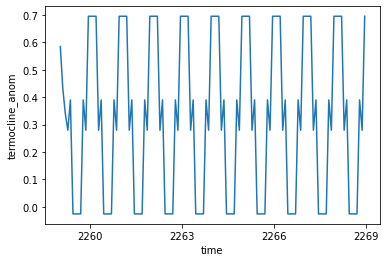

In [18]:
termo_anom_smooth[0].isel(time=slice(0,120)).plot()

In [7]:
# Parameters: Regression Results
## Equazione 1: dT_E/dt = R*T_E + F_1*h_W
R = [np.nan, 0.0921, 0.0960, 0.1108, 0.1158, 0.1106, 0.1068] # Coeff T_E
F_1 = [np.nan, -0.0124, -0.0123, -0.0120, -0.0099, -0.0091, -0.0095] # Coeff h_W
## Equazione 2: dh_W/dt = -\epsilon*h_W - F_2*T_E
epsilon = list((-1)*np.array([np.nan, -0.0011, -0.0961, -0.1111, -0.1158, -0.1107, -0.1064])) # Coeff h_W
F_2 = list((-1)*np.array([np.nan, 2.1281, 2.3954, 2.6154, 3.0886, 3.3394, 3.5495])) # Coeff T_E

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

def multi_linear_regression(observable, drivers_dict, plot_res = True):
    """
    Perform multi-linear regression analysis.
    
    Parameters:
    -----------
    observable : array-like
        Dependent variable (Y)
    drivers_dict : dict
        Dictionary of independent variables {name: values}
    
    Returns:
    --------
    dict : Results dictionary with model, coefficients, and metrics
    """
    
    # Create DataFrame
    df = pd.DataFrame(drivers_dict)
    
    # Prepare data
    X = df[list(drivers_dict.keys())]
    y = observable
    
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Calculate metrics
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    # Results dictionary
    results = {
        'model': model,
        'r2_score': r2,
        'rmse': rmse,
        'coefficients': dict(zip(X.columns, model.coef_)),
        'intercept': model.intercept_,
        'predictions': y_pred,
        'residuals': y - y_pred
    }
    
    # Print results
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    print("\nCoefficients:")
    for feature, coef in results['coefficients'].items():
        print(f"  {feature}: {coef:.4f}")
    
    # # Detailed statistics if requested
    # if detailed_stats:
    #     X_with_const = sm.add_constant(X)
    #     model_sm = sm.OLS(y, X_with_const).fit()
    #     print(f"\nDetailed Statistics:")
    #     print(model_sm.summary())

    if plot_res:
        # Create diagnostic plots
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))

        # 1. Actual vs Predicted
        axes[0,0].scatter(y, y_pred, alpha=0.7)
        axes[0,0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
        axes[0,0].set_xlabel('Actual Values')
        axes[0,0].set_ylabel('Predicted Values')
        axes[0,0].set_title('Actual vs Predicted')
        axes[0,0].grid(linestyle='--', color='gray')

        # 2. Residuals vs Predicted
        residuals = y - y_pred
        axes[0,1].scatter(y_pred, residuals, alpha=0.7)
        axes[0,1].axhline(y=0, color='r', linestyle='--')
        axes[0,1].set_xlabel('Predicted Values')
        axes[0,1].set_ylabel('Residuals')
        axes[0,1].set_title('Residuals vs Predicted')
        axes[0,1].grid(linestyle='--', color='gray')

        # # 3. Feature importance (coefficients)
        # feature_importance = pd.DataFrame({
        #     'feature': X.columns,
        #     'coefficient': model.coef_,
        #     'abs_coefficient': np.abs(model.coef_)
        # }).sort_values('abs_coefficient', ascending=True)

        # #axes[1,0].barh(feature_importance['feature'], feature_importance['coefficient'])
        # axes[1,0].barh(results['coefficients'].keys(), results['coefficients'].values())
        # axes[1,0].set_xlabel('Coefficient Value')
        # axes[1,0].set_title('Feature Coefficients')
        # axes[1,0].grid(True, alpha=0.3)

        # 4. Correlation matrix
        correlation_matrix = df.corr()
        imsh = axes[1,1].imshow(correlation_matrix, cmap='coolwarm', vmin = -1, vmax = 1)
        axes[1,1].set_title('Correlation Matrix')
        plt.colorbar(imsh)

        plt.tight_layout()

        return results, fig
    else:
        return results

In [ ]:
""" Verifiche """

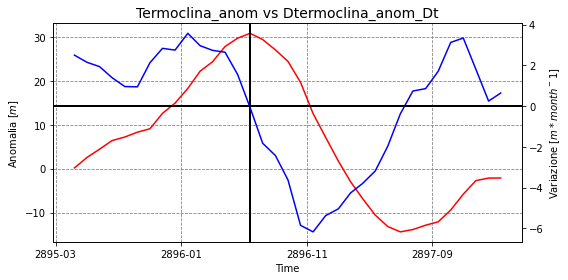

In [ ]:
""" Sfasamento anomalia termoclina VS Dtermoclina_anom_Dt """

time_termo = termo_anom_smooth.isel(time=slice(75, 110))['time'].values
time_der = Dtermo_anom_Dt_smooth.isel(time=slice(75, 110))['time'].values
idx=termo_anom_smooth.isel(time=slice(75, 110)).argmax(dim='time')
#max = termo_anom_smooth.isel(time=slice(75, 110)).max().values
fig, ax = plt.subplots(figsize=(8, 4))
twin = ax.twinx()
ax.plot(time_termo, termo_anom_smooth.isel(time=slice(75, 110)), color='r')
twin.plot(time_der, Dtermo_anom_Dt_smooth.isel(time=slice(75, 110)), color='b')
ax.axvline(x=time_termo[idx], color='black', linewidth=2)
twin.axhline(y=0.0, color='black', linewidth=2)
ax.set_title('Sfasamento: Termoclina_anom vs Dtermoclina_anom_Dt', fontsize=14)
ax.set_xlabel('Time', fontsize=10)
ax.set_ylabel('Anomalia 'r'$[m]$', fontsize=10)
twin.set_ylabel('Variazione 'r'$[m*month^-1]$', fontsize=10)
ax.grid(linestyle='--', color='gray')
plt.tight_layout()
# Display the figure
plt.show()
# Chiusura immagine
plt.close()

In [ ]:
""" TEST funzione regressione """

dizionario = {
   'dict_SSTA': SSTA_smooth,
   'dict_TermoA': termo_anom_smooth

}
# combinazione lineare
combo = SSTA_smooth*0.7 + termo_anom_smooth*1.5

R² Score: 1.0000
RMSE: 0.0000
Intercept: 0.0000

Coefficients:
  dict_SSTA: 0.7000
  dict_TermoA: 1.5000


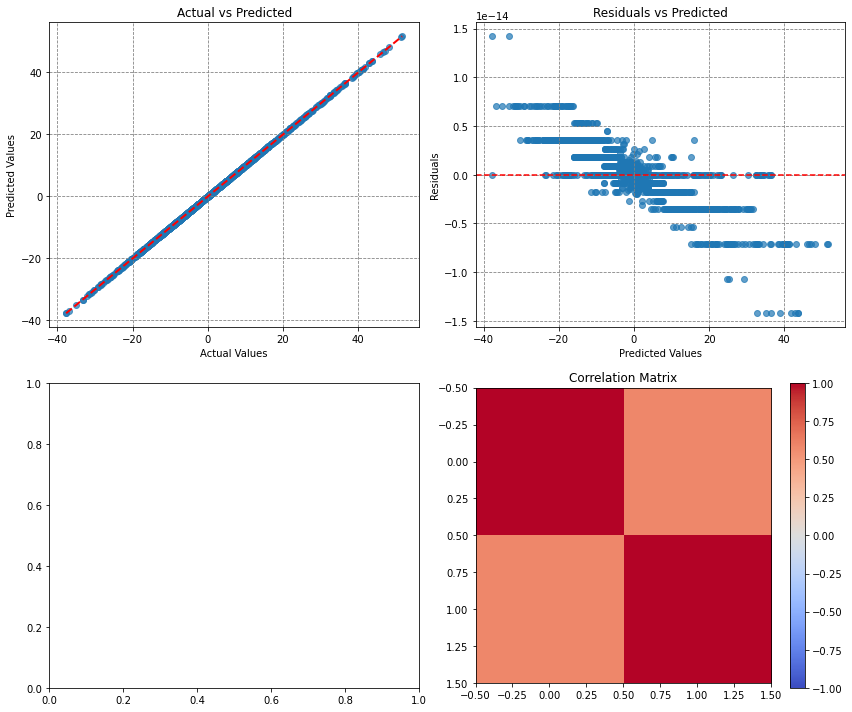

In [9]:
pippo , pluto = multi_linear_regression(combo, dizionario, True)

In [ ]:
""" Fine verifiche """

In [ ]:
def interpolate_hole(array):
    nans = np.isnan(array)
    x = np.arange(len(array))
    array[nans] = np.interp(x[nans], x[~nans], array[~nans])
    return array

In [60]:
len(indipendent_var_eq1['pi-control']['thetao_anom'])

6000

In [ ]:
# Matching
indipendent_var_eq1['pi-control']['tos_anom'] = indipendent_var_eq1['pi-control']['tos_anom'].sel(time=indipendent_var_eq1['pi-control']['thetao_anom']['time'])
DSSTA_Dt_smooth[0] = DSSTA_Dt_smooth[0].sel(time=indipendent_var_eq1['pi-control']['thetao_anom']['time'])

R² Score: 0.0000
RMSE: 0.1243
Intercept: 0.0001

Coefficients:
  tos_anom: -0.0004
  thetao_anom: -0.0003


/tmp/ipykernel_1190748/1501716040.py:102: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(imsh)


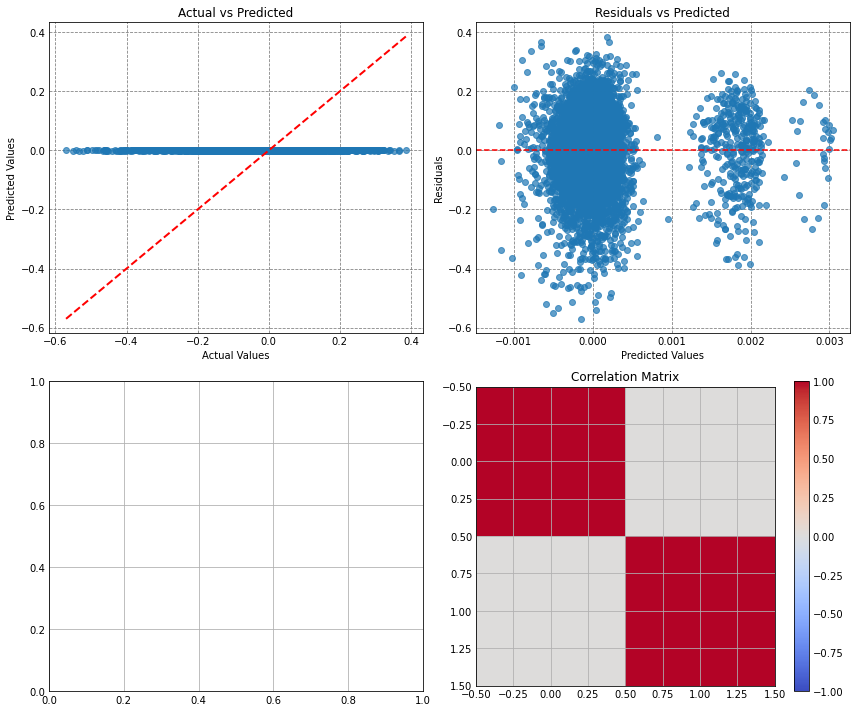

In [61]:
""" Applichiamo la regressione alla prima eqazione per il dataset pi-control: y=var_dipendente= dT_e/dt; x= var_indipendente T_e, h_W """
results_pi , fig_pi = multi_linear_regression(DSSTA_Dt_smooth[0], indipendent_var_eq1['pi-control'], True)

R² Score: 0.4853
RMSE: 0.1056
Intercept: -0.0001

Coefficients:
  tos_anom: 0.0921
  thetao_anom: -0.0124


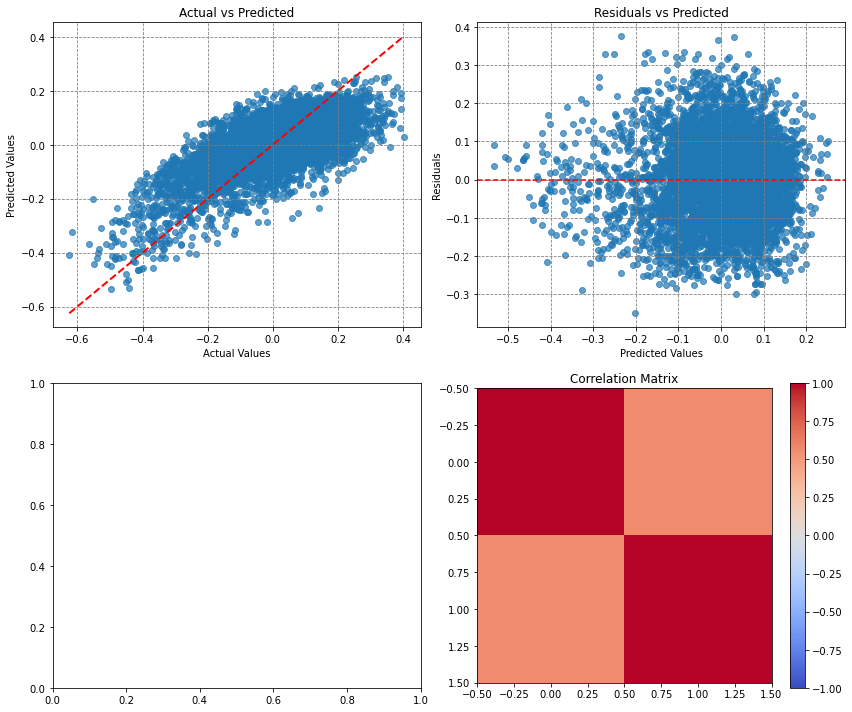

In [40]:
""" Applichiamo la regressione alla prima eqazione per il dataset b990: y=var_dipendente= dT_e/dt; x= var_indipendente T_e, h_W """
results_b990 , fig_b990 = multi_linear_regression(DSSTA_Dt_smooth[1], indipendent_var_eq1['b990'], True)

R² Score: 0.5888
RMSE: 0.1109
Intercept: -0.0001

Coefficients:
  tos_anom: 0.0960
  thetao_anom: -0.0123


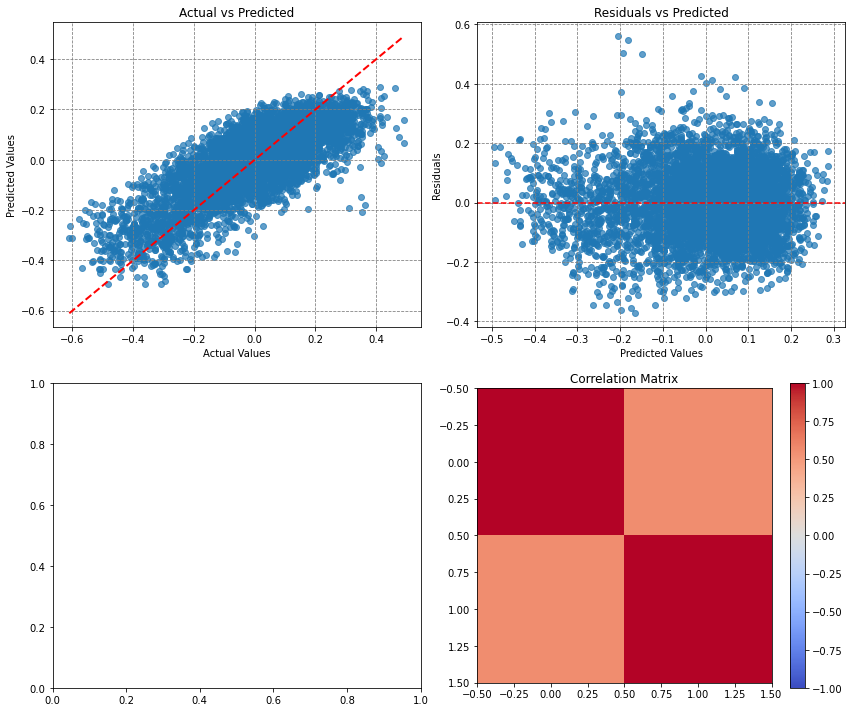

In [41]:
""" Applichiamo la regressione alla prima eqazione per il dataset b025: y=var_dipendente= dT_e/dt; x= var_indipendente T_e, h_W """
results_b025 , fig_b025 = multi_linear_regression(DSSTA_Dt_smooth[2], indipendent_var_eq1['b025'], True)

R² Score: 0.6796
RMSE: 0.1123
Intercept: -0.0000

Coefficients:
  tos_anom: 0.1108
  thetao_anom: -0.0120


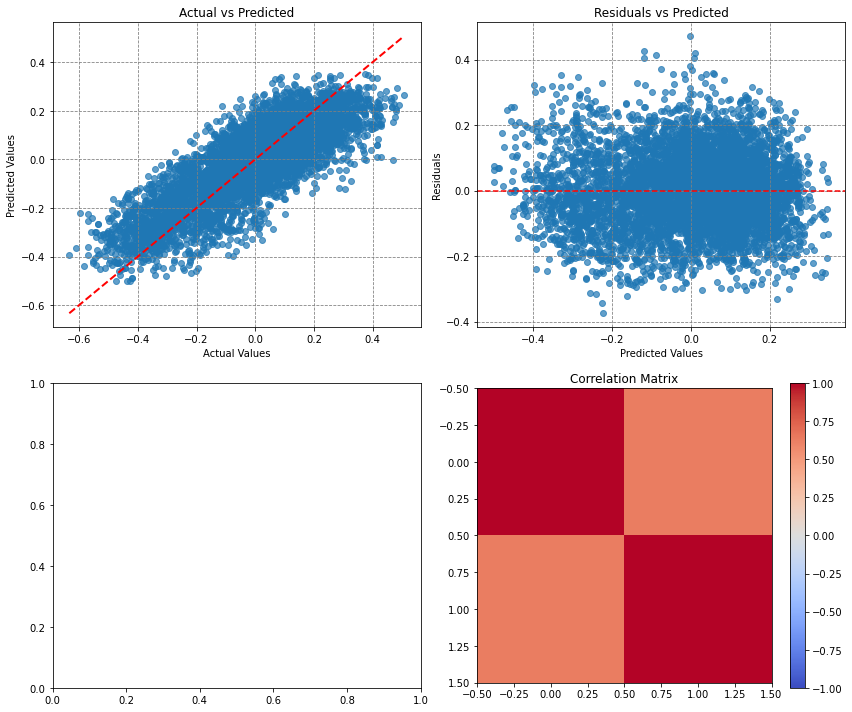

In [42]:
""" Applichiamo la regressione alla prima eqazione per il dataset b050: y=var_dipendente= dT_e/dt; x= var_indipendente T_e, h_W """
results_b050 , fig_b050 = multi_linear_regression(DSSTA_Dt_smooth[3], indipendent_var_eq1['b050'], True)

R² Score: 0.6650
RMSE: 0.1056
Intercept: -0.0003

Coefficients:
  tos_anom: 0.1158
  thetao_anom: -0.0099


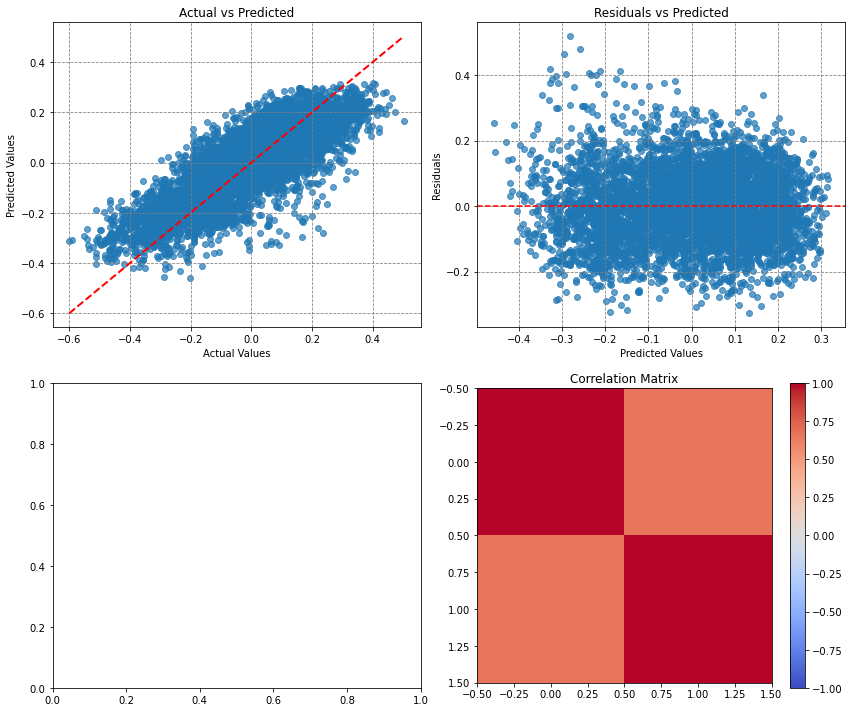

In [43]:
""" Applichiamo la regressione alla prima eqazione per il dataset b065: y=var_dipendente= dT_e/dt; x= var_indipendente T_e, h_W """
results_b065 , fig_b065 = multi_linear_regression(DSSTA_Dt_smooth[4], indipendent_var_eq1['b065'], True)

R² Score: 0.6598
RMSE: 0.0942
Intercept: -0.0001

Coefficients:
  tos_anom: 0.1106
  thetao_anom: -0.0091


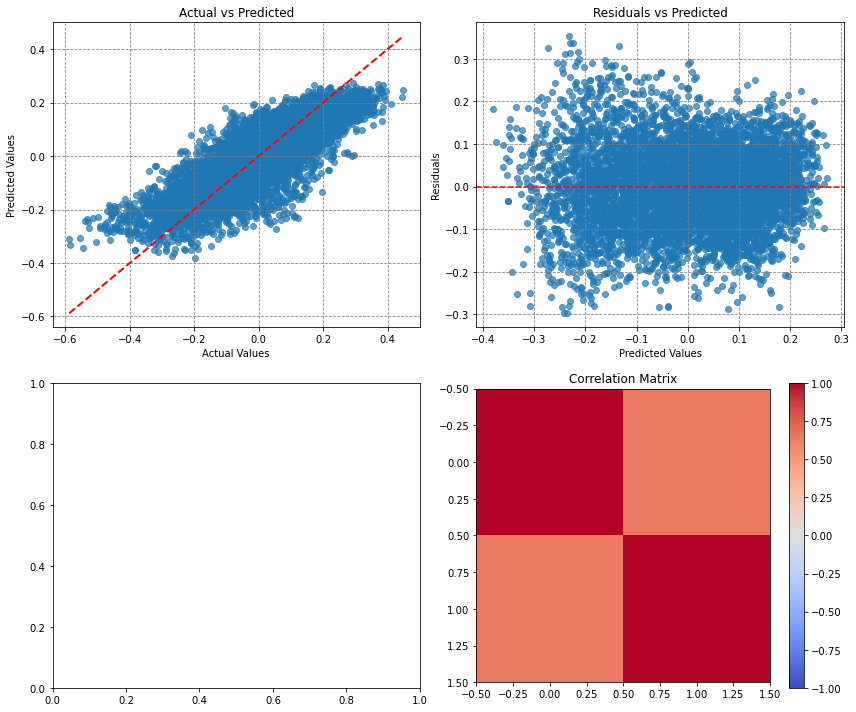

In [44]:
""" Applichiamo la regressione alla prima eqazione per il dataset b080: y=var_dipendente= dT_e/dt; x= var_indipendente T_e, h_W """
results_b080 , fig_b080 = multi_linear_regression(DSSTA_Dt_smooth[5], indipendent_var_eq1['b080'], True)

R² Score: 0.6566
RMSE: 0.0765
Intercept: 0.0001

Coefficients:
  tos_anom: 0.1068
  thetao_anom: -0.0095


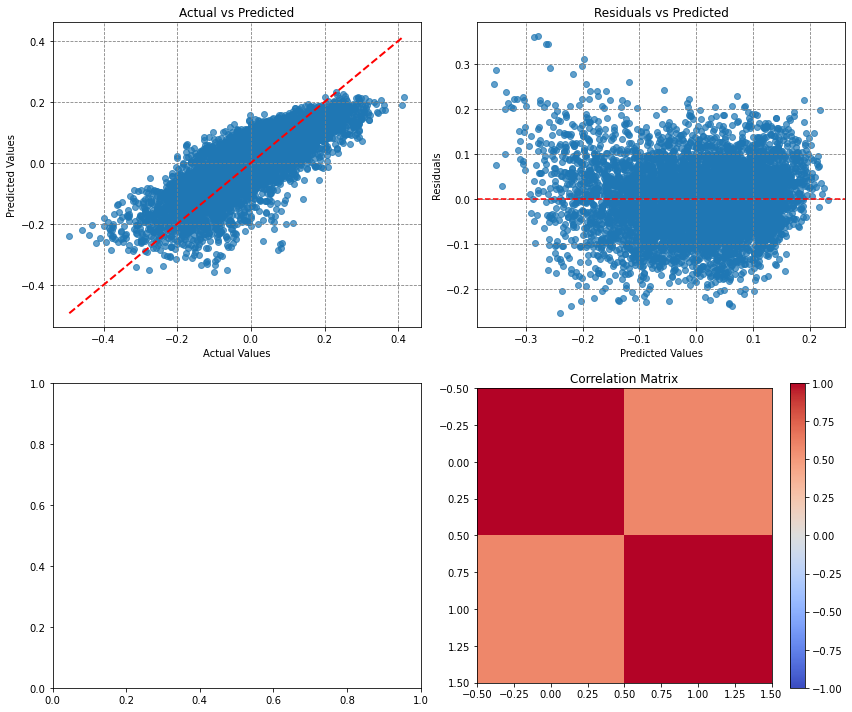

In [8]:
""" Applichiamo la regressione alla prima eqazione per il dataset b100: y=var_dipendente= dT_e/dt; x= var_indipendente T_e, h_W """
results_b100 , fig_b100 = multi_linear_regression(DSSTA_Dt_smooth[6], indipendent_var_eq1['b100'], True)

In [16]:
######################################################################################################

In [9]:
""" Applichiamo la regressione alla seconda eqazione per il dataset pi-control: y=var_dipendente= dh_W/dt; x= var_indipendente h_W, T_e """
results_pi , fig_pi = multi_linear_regression(Dtermo_anom_Dt_smooth[0], indipendent_var_eq2['pi-control'], True)

ValueError: All arrays must be of the same length

R² Score: 0.5292
RMSE: 1.2645
Intercept: -0.0011

Coefficients:
  thetao_anom: -0.0916
  tos_anom: 2.1281


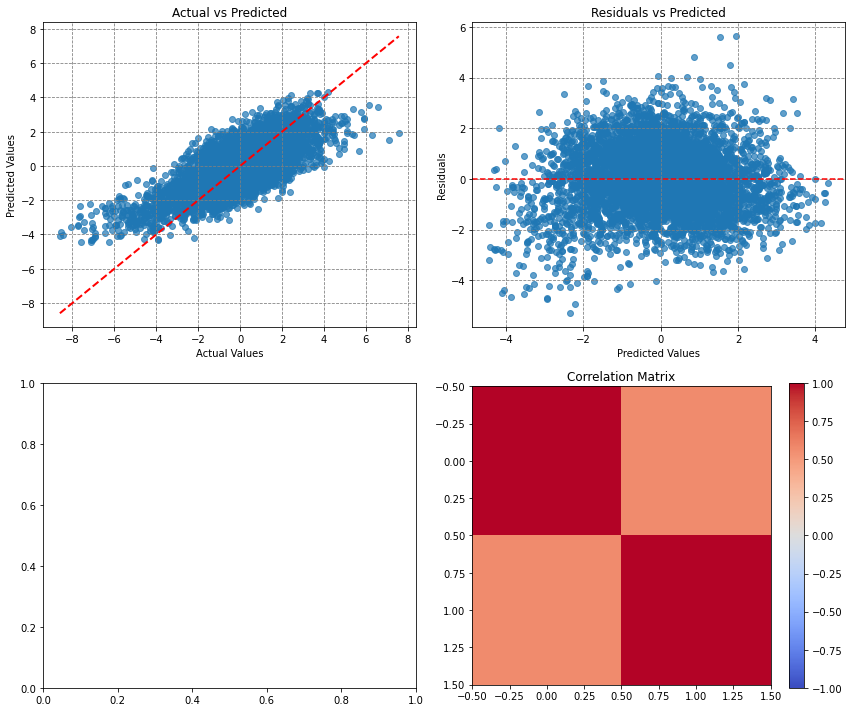

In [10]:
""" Applichiamo la regressione alla seconda eqazione per il dataset b990: y=var_dipendente= dh_W/dt; x= var_indipendente h_W, T_e """
results_b990 , fig_b990 = multi_linear_regression(Dtermo_anom_Dt_smooth[1], indipendent_var_eq2['b990'], True)

R² Score: 0.6015
RMSE: 1.5056
Intercept: -0.0013

Coefficients:
  thetao_anom: -0.0961
  tos_anom: 2.3954


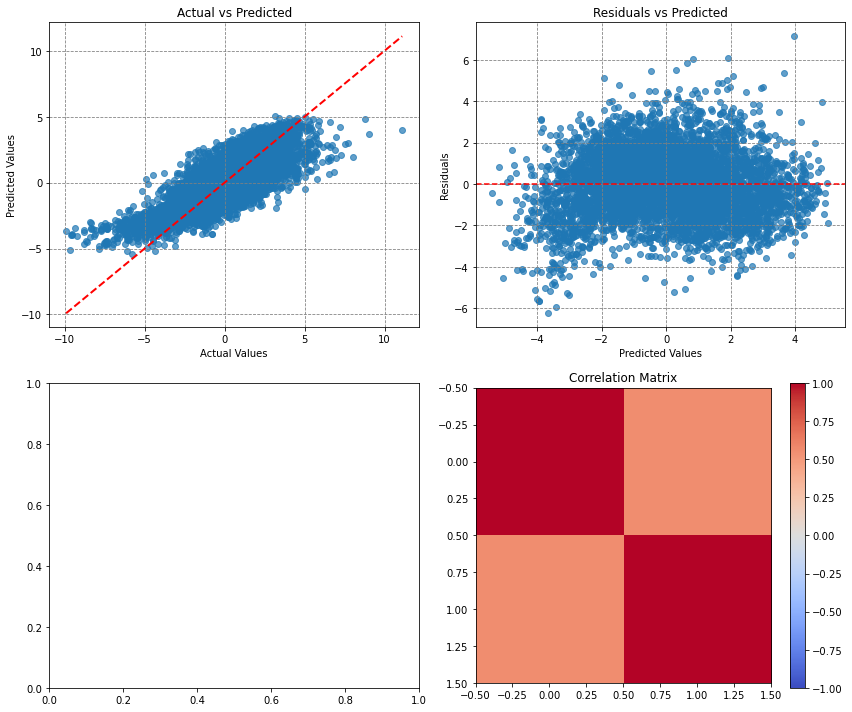

In [11]:
""" Applichiamo la regressione alla seconda eqazione per il dataset b025: y=var_dipendente= dh_W/dt; x= var_indipendente h_W, T_e """
results_b025 , fig_b025 = multi_linear_regression(Dtermo_anom_Dt_smooth[2], indipendent_var_eq2['b025'], True)

R² Score: 0.6689
RMSE: 1.7031
Intercept: -0.0014

Coefficients:
  thetao_anom: -0.1111
  tos_anom: 2.6154


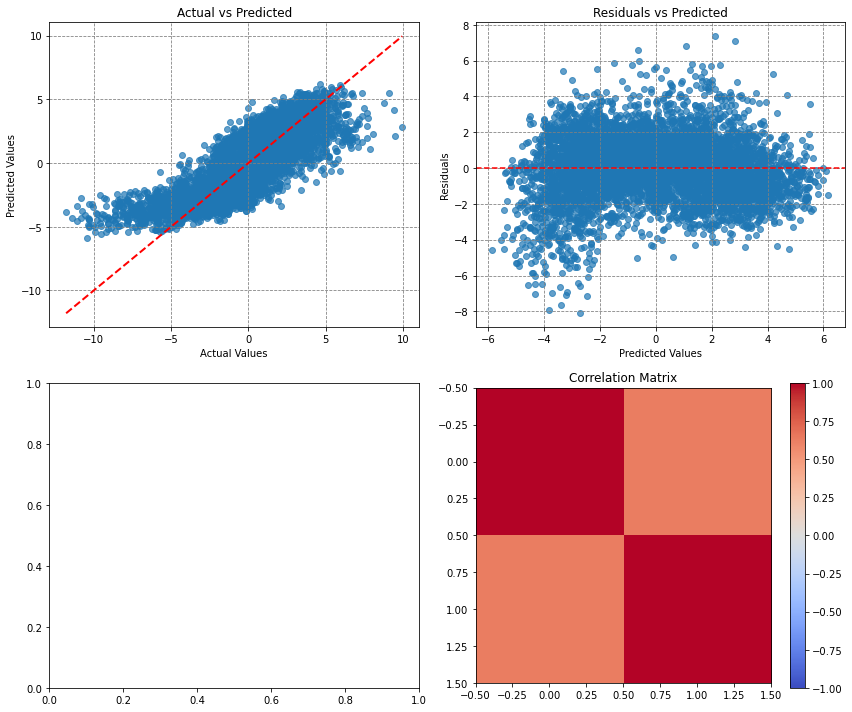

In [12]:
""" Applichiamo la regressione alla seconda eqazione per il dataset b050: y=var_dipendente= dh_W/dt; x= var_indipendente h_W, T_e """
results_b050 , fig_b050 = multi_linear_regression(Dtermo_anom_Dt_smooth[3], indipendent_var_eq2['b050'], True)

R² Score: 0.6572
RMSE: 1.9048
Intercept: -0.0157

Coefficients:
  thetao_anom: -0.1158
  tos_anom: 3.0886


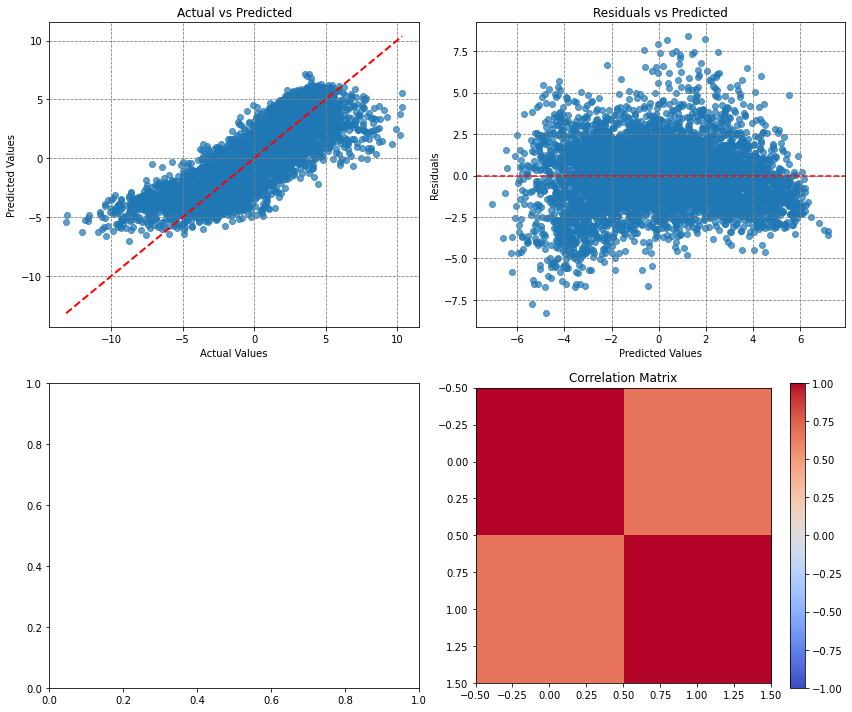

In [13]:
""" Applichiamo la regressione alla seconda eqazione per il dataset b065: y=var_dipendente= dh_W/dt; x= var_indipendente h_W, T_e """
results_b065 , fig_b065 = multi_linear_regression(Dtermo_anom_Dt_smooth[4], indipendent_var_eq2['b065'], True)

R² Score: 0.6483
RMSE: 1.8574
Intercept: -0.0072

Coefficients:
  thetao_anom: -0.1107
  tos_anom: 3.3394


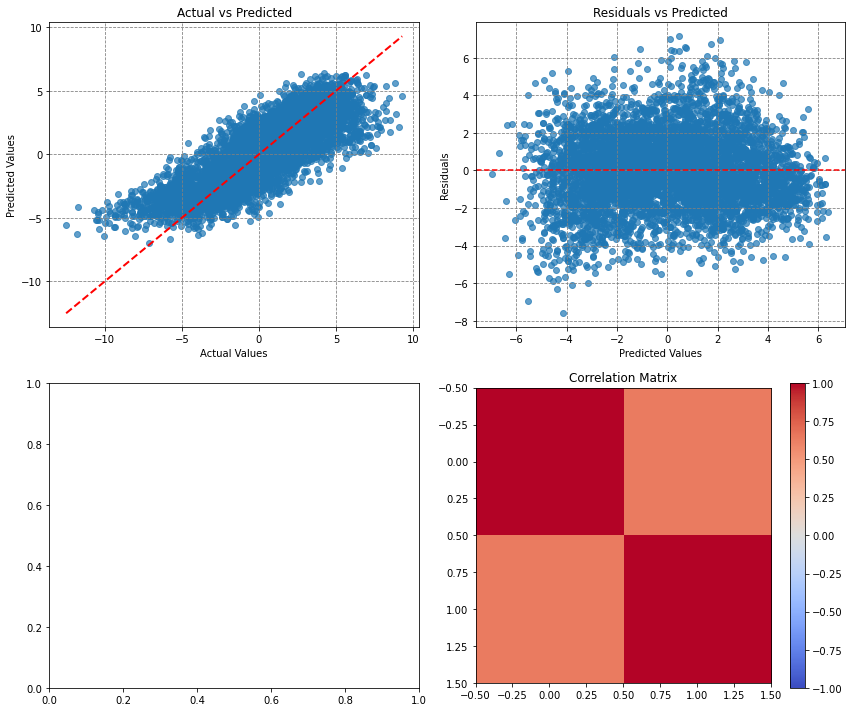

In [14]:
""" Applichiamo la regressione alla seconda eqazione per il dataset b080: y=var_dipendente= dh_W/dt; x= var_indipendente h_W, T_e """
results_b080 , fig_b080 = multi_linear_regression(Dtermo_anom_Dt_smooth[5], indipendent_var_eq2['b080'], True)

R² Score: 0.6407
RMSE: 1.5353
Intercept: 0.0018

Coefficients:
  thetao_anom: -0.1064
  tos_anom: 3.5495


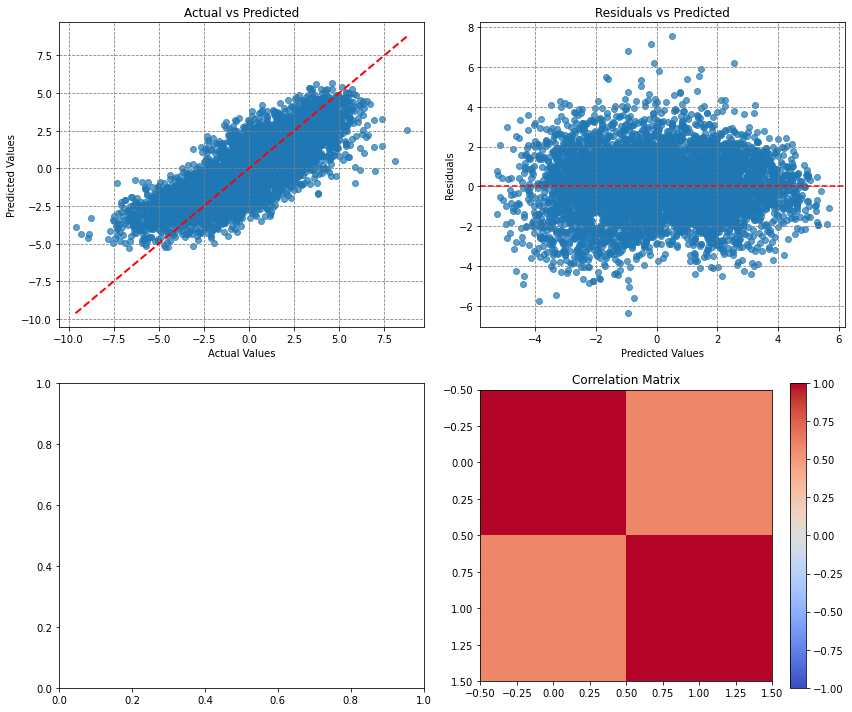

In [15]:
""" Applichiamo la regressione alla seconda eqazione per il dataset b100: y=var_dipendente= dh_W/dt; x= var_indipendente h_W, T_e """
results_b100 , fig_b100 = multi_linear_regression(Dtermo_anom_Dt_smooth[6], indipendent_var_eq2['b100'], True)

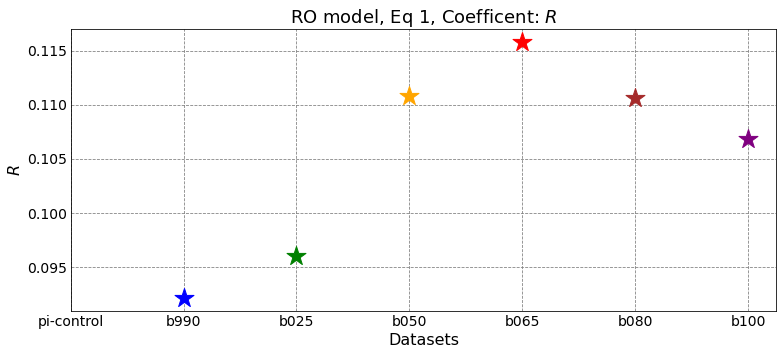

In [30]:
###################################################################################
###################### RO model, Eq 1, T_E Coefficents: R #########################
################################## (Scatter Plot) #################################
###################################################################################
x_ticks_positions = list(np.arange(1, dataset_names_iteration+1, 1))

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10, 4))
# Scatters plot
ax.scatter(x_ticks_positions[0], R[0], s=area_500, color=colors[0], marker=markers[0], alpha=1)
for i in range(dataset_names_iteration-1):
   ax.scatter(x_ticks_positions[i+1], R[i+1], s=area_500, color=colors[i+1], marker=markers[1], alpha=1)
# Set Labels
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(['pi-control', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100'], fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.grid(linestyle='--', color='gray')
ax.set_title('RO model, Eq 1, Coefficent: ' r'$R$', fontsize=18)
ax.set_xlabel('Datasets', fontsize=16)
ax.set_ylabel(r'$R$', fontsize=16)
# Display the figure
plt.show()
# Save the current figure to a file
fig.savefig(common_dir_home + dir_images_9 + 'ROmod_Eq1_R.pdf', bbox_inches='tight')
fig.savefig(common_dir_home + dir_images_9 + 'ROmod_Eq1_R.pdf', bbox_inches='tight', dpi=150)
# Chiusura immagine
plt.close()

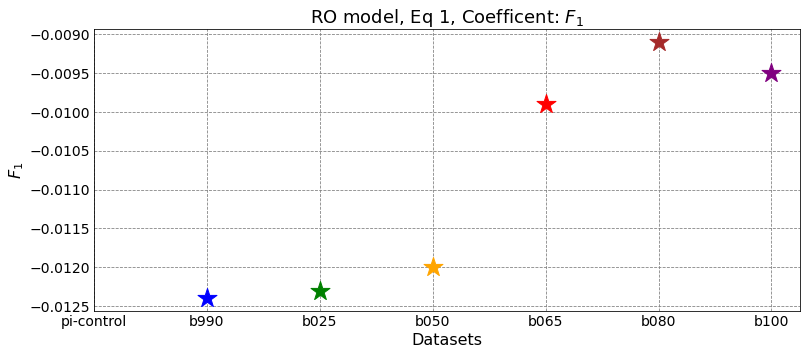

In [32]:
###################################################################################
###################### RO model, Eq 1, h_W Coefficents: F_1 #######################
################################## (Scatter Plot) #################################
###################################################################################
x_ticks_positions = list(np.arange(1, dataset_names_iteration+1, 1))

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10, 4))
# Scatters plot
ax.scatter(x_ticks_positions[0], F_1[0], s=area_500, color=colors[0], marker=markers[0], alpha=1)
for i in range(dataset_names_iteration-1):
   ax.scatter(x_ticks_positions[i+1], F_1[i+1], s=area_500, color=colors[i+1], marker=markers[1], alpha=1)
# Set Labels
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(['pi-control', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100'], fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.grid(linestyle='--', color='gray')
ax.set_title('RO model, Eq 1, Coefficent: ' r'$F_1$', fontsize=18)
ax.set_xlabel('Datasets', fontsize=16)
ax.set_ylabel(r'$F_1$', fontsize=16)
# Display the figure
plt.show()
# Save the current figure to a file
fig.savefig(common_dir_home + dir_images_9 + 'ROmod_Eq1_F1.pdf', bbox_inches='tight')
fig.savefig(common_dir_home + dir_images_9 + 'ROmod_Eq1_F1.pdf', bbox_inches='tight', dpi=150)
# Chiusura immagine
plt.close()

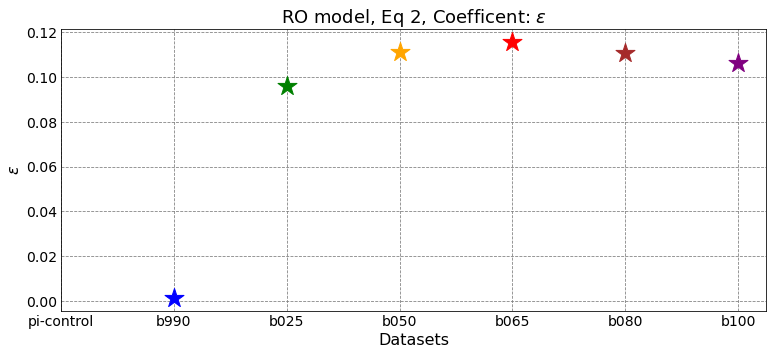

In [39]:
###################################################################################
################### RO model, Eq 2, h_W Coefficents: \epsilon #####################
################################## (Scatter Plot) #################################
###################################################################################
x_ticks_positions = list(np.arange(1, dataset_names_iteration+1, 1))

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10, 4))
# Scatters plot
ax.scatter(x_ticks_positions[0], epsilon[0], s=area_500, color=colors[0], marker=markers[0], alpha=1)
for i in range(dataset_names_iteration-1):
   ax.scatter(x_ticks_positions[i+1], epsilon[i+1], s=area_500, color=colors[i+1], marker=markers[1], alpha=1)
# Set Labels
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(['pi-control', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100'], fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.grid(linestyle='--', color='gray')
ax.set_title('RO model, Eq 2, Coefficent: ' r'$\epsilon$', fontsize=18)
ax.set_xlabel('Datasets', fontsize=16)
ax.set_ylabel(r'$\epsilon$', fontsize=16)
# Display the figure
plt.show()
# Save the current figure to a file
fig.savefig(common_dir_home + dir_images_9 + 'ROmod_Eq2_epsilon.pdf', bbox_inches='tight')
fig.savefig(common_dir_home + dir_images_9 + 'ROmod_Eq2_epsilon.pdf', bbox_inches='tight', dpi=150)
# Chiusura immagine
plt.close()

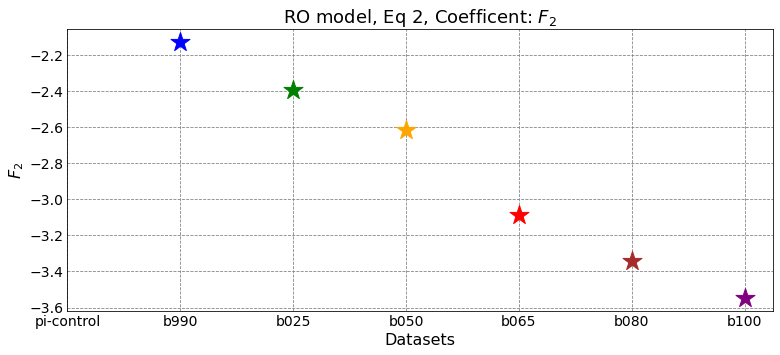

In [44]:
###################################################################################
###################### RO model, Eq 1, T_E Coefficents: R #########################
################################## (Scatter Plot) #################################
###################################################################################
x_ticks_positions = list(np.arange(1, dataset_names_iteration+1, 1))

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(10, 4))
# Scatters plot
ax.scatter(x_ticks_positions[0], F_2[0], s=area_500, color=colors[0], marker=markers[0], alpha=1)
for i in range(dataset_names_iteration-1):
   ax.scatter(x_ticks_positions[i+1], F_2[i+1], s=area_500, color=colors[i+1], marker=markers[1], alpha=1)
# Set Labels
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(['pi-control', 'b990', 'b025', 'b050', 'b065', 'b080', 'b100'], fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.grid(linestyle='--', color='gray')
ax.set_title('RO model, Eq 2, Coefficent: ' r'$F_2$', fontsize=18)
ax.set_xlabel('Datasets', fontsize=16)
ax.set_ylabel(r'$F_2$', fontsize=16)
# Display the figure
plt.show()
# Save the current figure to a file
fig.savefig(common_dir_home + dir_images_9 + 'ROmod_Eq2_F2.pdf', bbox_inches='tight')
fig.savefig(common_dir_home + dir_images_9 + 'ROmod_Eq2_F2.pdf', bbox_inches='tight', dpi=150)
# Chiusura immagine
plt.close()